# Experiment 2

Import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset


In [3]:
df=pd.read_csv('/content/games.csv')

In [4]:
df

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16


In [5]:
df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [6]:
df.tail()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16
252,2018122201,12/22/2018,20:20:00,LAC,BAL,16


In [7]:
df.describe(include="all")

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
count,2.530000e+02,253,253,253,253,253.000000
unique,NaN,50,10,32,32,NaN
top,NaN,12/30/2018,13:00:00,PHI,ATL,NaN
freq,NaN,16,136,8,8,NaN
mean,2.018108e+09,NaN,NaN,NaN,NaN,9.122530
std,1.144901e+04,NaN,NaN,NaN,NaN,4.979801
min,2.018091e+09,NaN,NaN,NaN,NaN,1.000000
25%,2.018101e+09,NaN,NaN,NaN,NaN,5.000000
50%,2.018110e+09,NaN,NaN,NaN,NaN,9.000000
75%,2.018121e+09,NaN,NaN,NaN,NaN,14.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


Visualizing our data

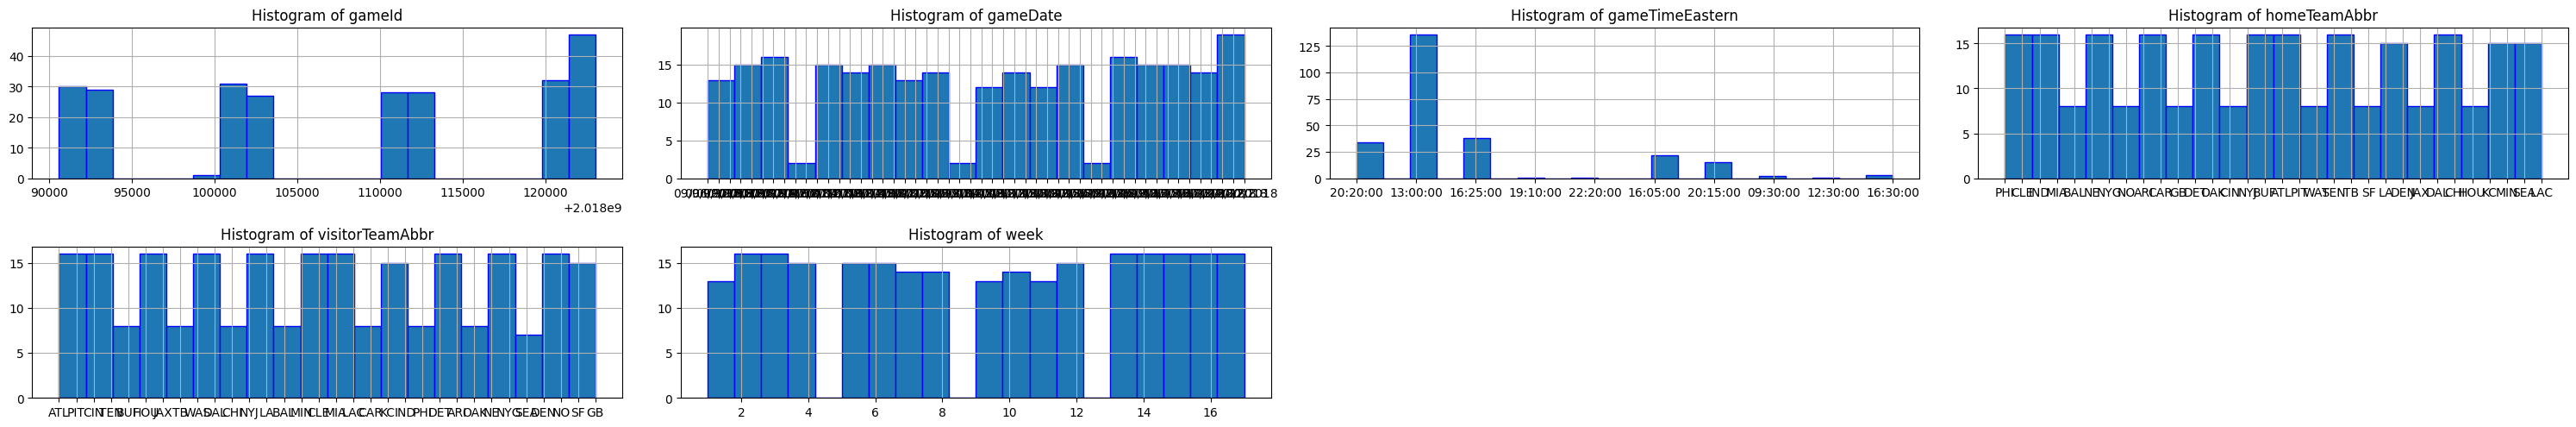

In [11]:
features = df.columns.tolist()

# Plot histograms for each feature
plt.figure(figsize=(30, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    df[feature].hist(bins=20, edgecolor='blue')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

Read all Null Values

In [12]:
df.isnull().sum()

,0
gameId,0
gameDate,0
gameTimeEastern,0
homeTeamAbbr,0
visitorTeamAbbr,0
week,0


Drop Null Values

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum()

,0
gameId,0
gameDate,0
gameTimeEastern,0
homeTeamAbbr,0
visitorTeamAbbr,0
week,0


Handling Duplicate Values

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16


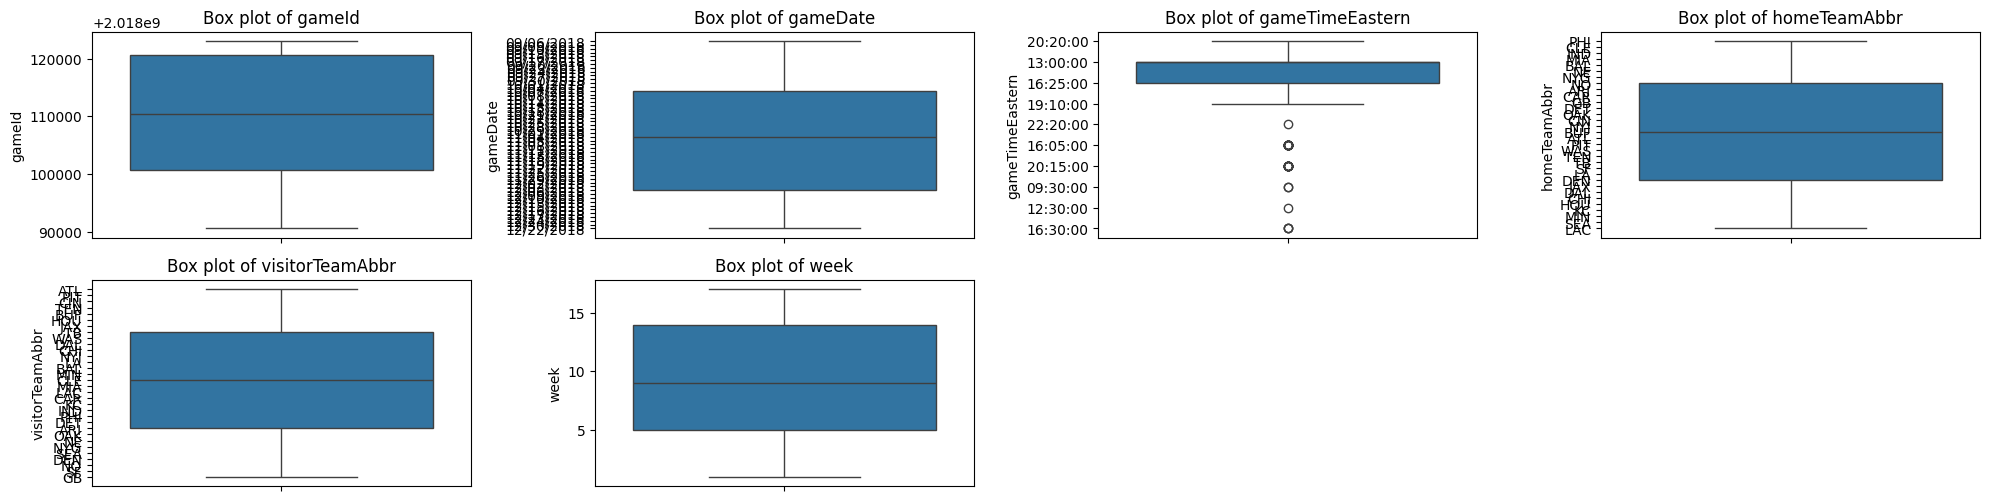

In [19]:
features = df.columns.tolist()
plt.figure(figsize=(20,15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

Using IQR to handle Outliers

In [20]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16


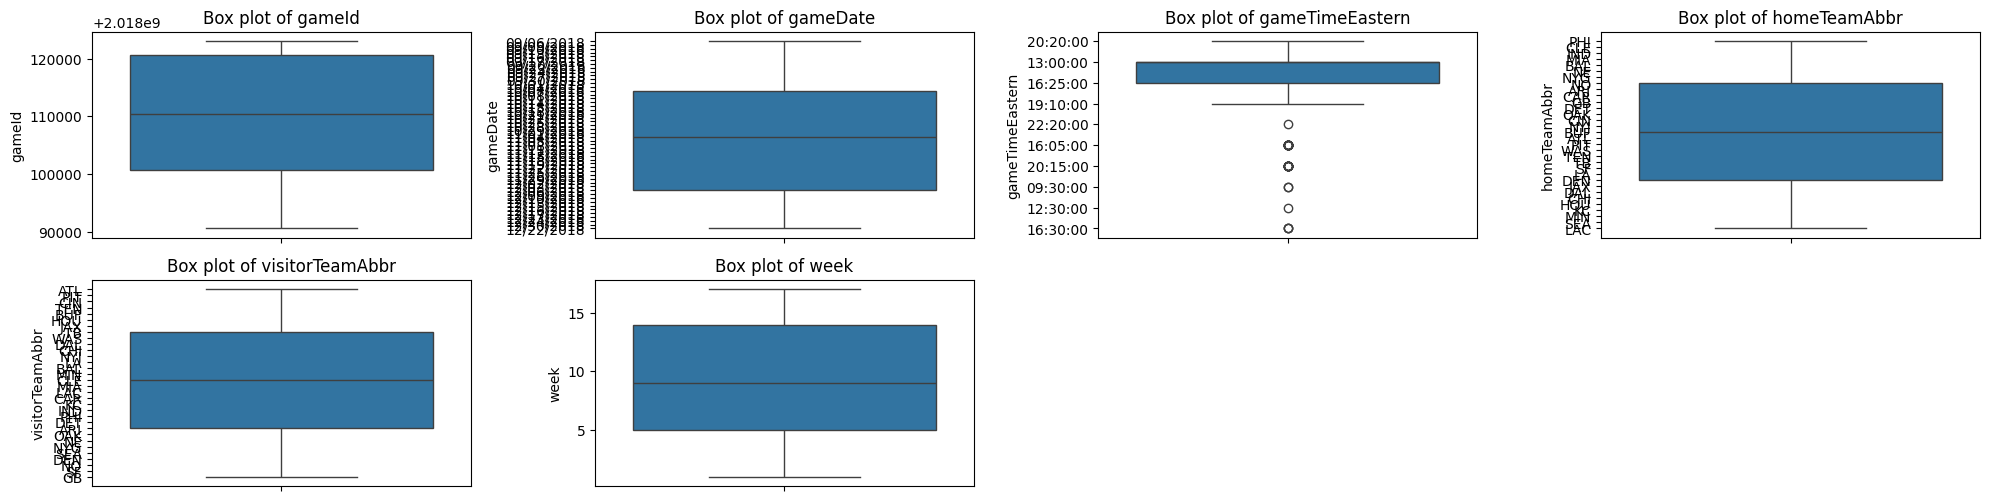

In [21]:
features = df.columns.tolist()
# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()